In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
df = pd.read_csv('Indeed.csv')
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)


In [104]:
df.describe()

,Unnamed: 0,Issued time,Star review,Number of reviews,Min salary,Max salary,Average salary
count,642.000000,642.000000,162.000000,162.000000,56.000000,56.000000,56.000000
mean,513.344237,20.714953,3.756173,5127.512346,61892.857143,66821.428571,64357.142857
std,298.792607,11.140770,0.302975,7224.502823,126992.151307,125772.826541,126315.323849
min,3.000000,0.000000,2.300000,2.000000,3000.000000,3000.000000,3000.000000
25%,251.250000,9.000000,3.500000,28.000000,25000.000000,30000.000000,27375.000000
50%,518.500000,29.000000,3.800000,618.000000,35000.000000,40000.000000,37750.000000
75%,794.750000,30.000000,3.900000,13394.000000,60000.000000,60000.000000,60000.000000
max,977.000000,30.000000,4.300000,29650.000000,800000.000000,800000.000000,800000.000000


In [105]:
df

,Unnamed: 0,Issued time,Country,Job category,Job title,Company,Part time/ Full Time,Star review,Number of reviews,Location,Job description,Indeed link,Min salary,Max salary,Average salary,Salary group,Minimum education level,Maximum education level,Python,Machine Learning,JavaScript,R,Java,IoT,Excel,Power BI,English,Chinese,SAS,Oracle,C++,C#,C,Qlik,alteryx,Tableau,SPSS,Powerpoint,PostgreSQL,SQL,MySQL,Visualisation tool,Programming tool,Star group
0,612,0,Hong Kong,Data analyst,Analyst Programmer/ Senior .NET Developer,Mtel Solutions Limited,Full-time,NaN,NaN,Hong Kong,"We are digital enabler\n\nWe create ideas, dep...",https://hk.indeed.com/rc/clk?jk=f49711d0e78bfd...,NaN,NaN,NaN,Not Mentioned,Diploma,Bachelor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0 stars
1,551,0,Hong Kong,Data analyst,Analyst Programmer (Java/ .NET),Speedy Group Corp. Limited,NaN,NaN,NaN,Hong Kong,Speedy Group is one of the leading integrated ...,https://hk.indeed.com/rc/clk?jk=ab040ca9bd68f0...,NaN,NaN,NaN,Not Mentioned,Bachelor,Bachelor,NaN,NaN,Y,NaN,Y,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0 stars
2,106,0,Hong Kong,Data analyst,"Analyst, Fixed Income and OTC Derivatives",BOCI,Full-time,3.8,5.0,Hong Kong,See Job Description\n\nThe role\n\nThis incumb...,https://hk.indeed.com/rc/clk?jk=54c8494dab2114...,NaN,NaN,NaN,Not Mentioned,Bachelor,Bachelor,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,563,0,Hong Kong,Data analyst,QA Engineer Automated,International Recruitment Group - IRG ltd,Full-time,NaN,NaN,Hong Kong,"Duties\nDesign, Develop, Maintain Automated Te...",https://hk.indeed.com/rc/clk?jk=51f27a6b2f73ab...,NaN,NaN,NaN,Not Mentioned,Not specified,Not specified,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0 stars
4,859,0,Hong Kong,Data scientist,Data Scientist (Team Lead),Conners Consulting,NaN,NaN,NaN,"Sheung Wan, Hong Kong Island",Job Highlights*Formulate long term data analys...,https://hk.indeed.com/company/Conners-Consulti...,NaN,NaN,NaN,Not Mentioned,Bachelor,Bachelor,Y,Y,NaN,Y,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,NaN,Y,Y,5.0 stars
5,528,0,Hong Kong,Data analyst,IT Audit & Risk Assurance(Analyst to Manager)3...,Xponential Personnel Limited,Full-time / Part-time,NaN,NaN,Hong Kong,XP Personnel is a Digital Recruitment Agency t...,https://hk.indeed.com/rc/clk?jk=70bdf31b92c718...,60000.0,60000.0,60000.0,60000-69999,Bachelor,Bachelor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0 stars
6,660,0,Hong Kong,Data analyst,System Analyst / Analyst Programmer / Programm...,Leadership Solutions Limited,Full-time,NaN,NaN,Hong Kong,Founded in Hong Kong since 2003 to servebusine...,https://hk.indeed.com/rc/clk?jk=12c53b11e9c798...,NaN,NaN,NaN,Not Mentioned,Bachelor,Bachelor,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0 stars
7,264,0,Hong Kong,Data analyst,"AVP/Associate/Analyst, Infrastructure (IT Divi...",BOC International Holdings Ltd,Full-time,3.5,4.0,Hong Kong,As a leading investment bank in China and Hong...,https://hk.indeed.com/rc/clk?jk=dedc3668844d4f...,NaN,NaN,NaN,Not Mentioned,Not specified,Not specified,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,33,0,Hong Kong,Data analyst,Business Analyst,KY & Company,NaN,NaN,NaN,Hong Kong,Perform in depth As Is To Be analysis to deliv...,https://hk.indeed.com/company/KY-&-Company/job...,NaN,NaN,NaN,Not Mentioned,Not specified,Not specified,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0 stars
9,631,0,Hong Kong,Data analyst,Change Manager -up to 65K 12 months rolling co...,Protiviti Hong Kong,Full-time,NaN,NaN,Hong Kong,Protiviti is a global consulting firm that del...,https://hk.i

# Data Size by Job Category

- Imbalanced Data Size

- Lead to inaccuracy to all analysis for Data Scientist


In [106]:
df['Job category'].value_counts()

Data analyst      497
Data scientist    145
Name: Job category, dtype: int64

# Salary Distribution 

- To prevent from being distracted, all data without mentioning salary is removed

30000-39999       15
20000-29999       14
60000-69999       10
40000-49999        8
70000 or above     6
10000-19999        1
Below 10000        1
50000-59999        1
Name: Salary group, dtype: int64

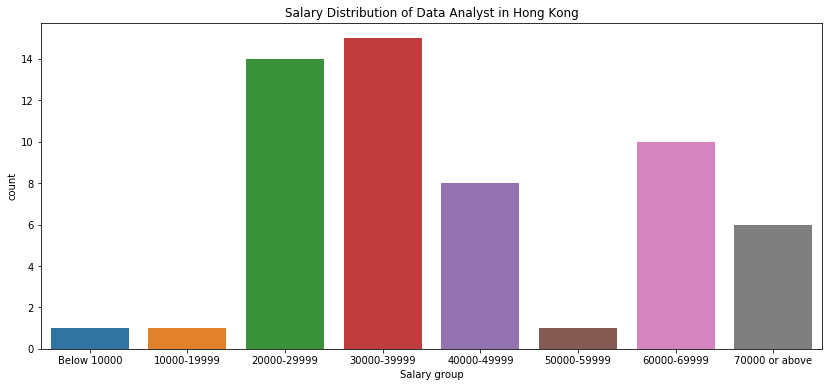

In [107]:
plt.figure(figsize=(14,6))
salary_df = df[df['Salary group'] != 'Not Mentioned']
sns.countplot(data=salary_df, x=salary_df['Salary group'], 
              order = ['Below 10000',
                       '10000-19999',
                       '20000-29999',
                       '30000-39999',
                       '40000-49999',
                       '50000-59999',
                       '60000-69999',
                       '70000 or above']).set_title('Salary Distribution of Data Analyst in Hong Kong')
df[df['Salary group'] != 'Not Mentioned']['Salary group'].value_counts()

# Language Requirement
- To see which language is important in getting a data job

Text(0.5, 1.0, 'Language Requirement in HK')

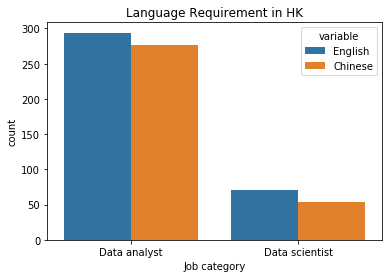

In [122]:
lang_df = pd.melt(df, id_vars =['Job category'], value_vars =['English', 'Chinese']) 
lang_df = lang_df[lang_df['value'].notnull()]
lang_df
sns.countplot(data=lang_df,x=lang_df['Job category'],hue=lang_df['variable']).set_title('Language Requirement in HK')

# Education Requirement

- To prevent from being distracted, all data without mentioning edu lv are removed


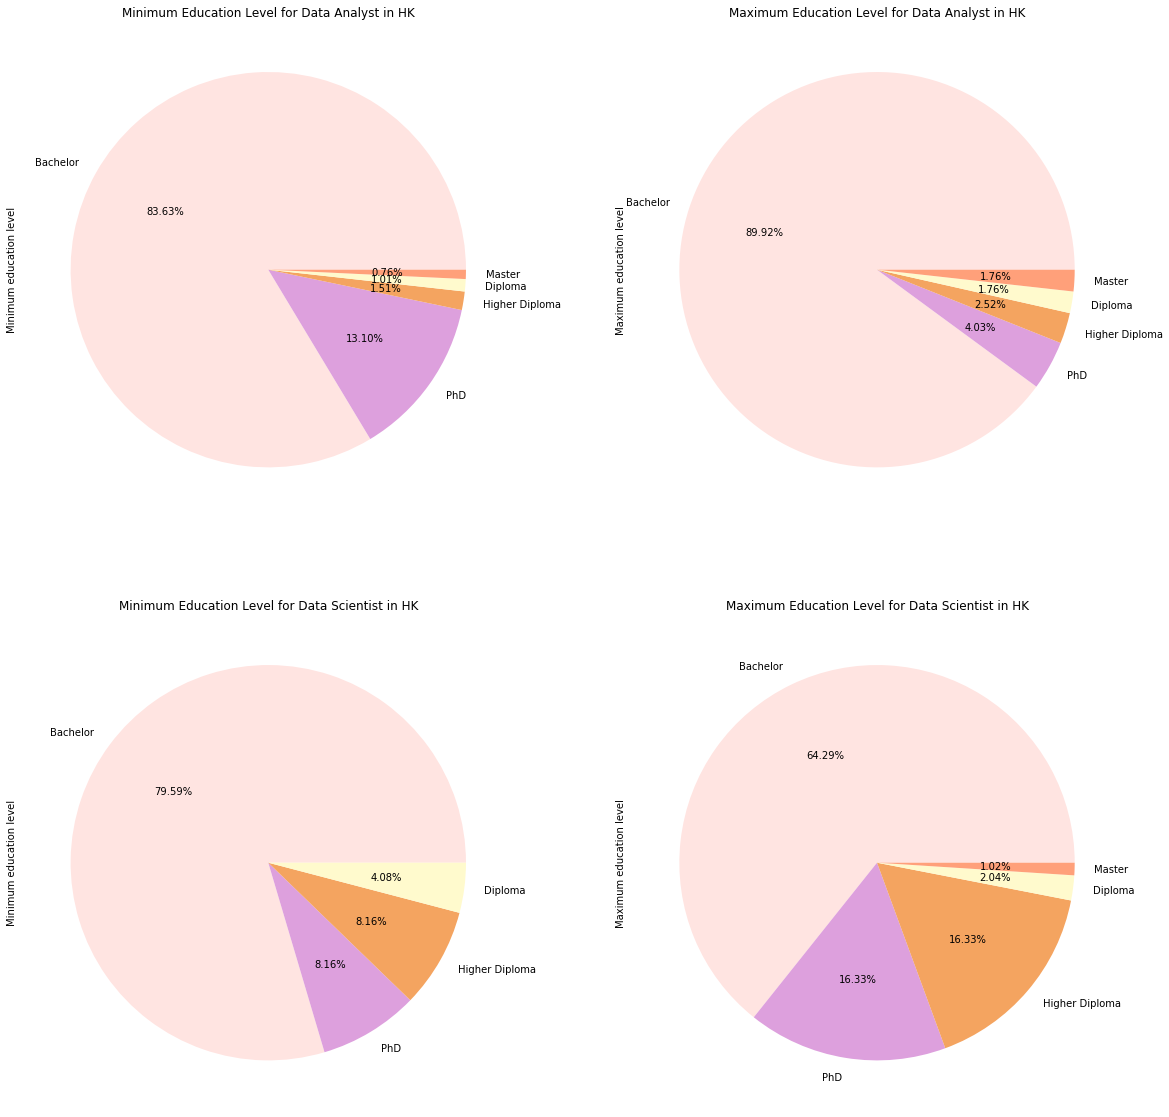

In [101]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
colors = ['mistyrose','plum','sandybrown','lemonchiffon','lightsalmon']
label = ['Bachelor','PhD','Higher Diploma','Diploma','Master']

df[(df['Job category'] == 'Data analyst') & (df['Minimum education level'] != 'Not specified')]['Minimum education level'].value_counts().plot(kind='pie',autopct='%.2f%%',title='Minimum Education Level for Data Analyst in HK', ax=ax, colors=colors, labels=label)
df[(df['Job category'] == 'Data analyst') & (df['Maximum education level'] != 'Not specified')]['Maximum education level'].value_counts().plot(kind='pie',autopct='%.2f%%',title='Maximum Education Level for Data Analyst in HK', ax=ax2,colors=colors, labels=label)
df[(df['Job category'] == 'Data scientist')  & (df['Minimum education level'] != 'Not specified')]['Minimum education level'].value_counts().plot(kind='pie',autopct='%.2f%%',title='Minimum Education Level for Data Scientist in HK', ax=ax3,colors=colors,labels=label)
df[(df['Job category'] == 'Data scientist') & (df['Maximum education level'] != 'Not specified')]['Maximum education level'].value_counts().plot(kind='pie',autopct='%.2f%%',title='Maximum Education Level for Data Scientist in HK', ax=ax4,colors=colors,labels=label)







# Visualisation Skills and Programming Skills

# Programming skills

Text(0.5, 1.0, 'Programming Requirement in HK')

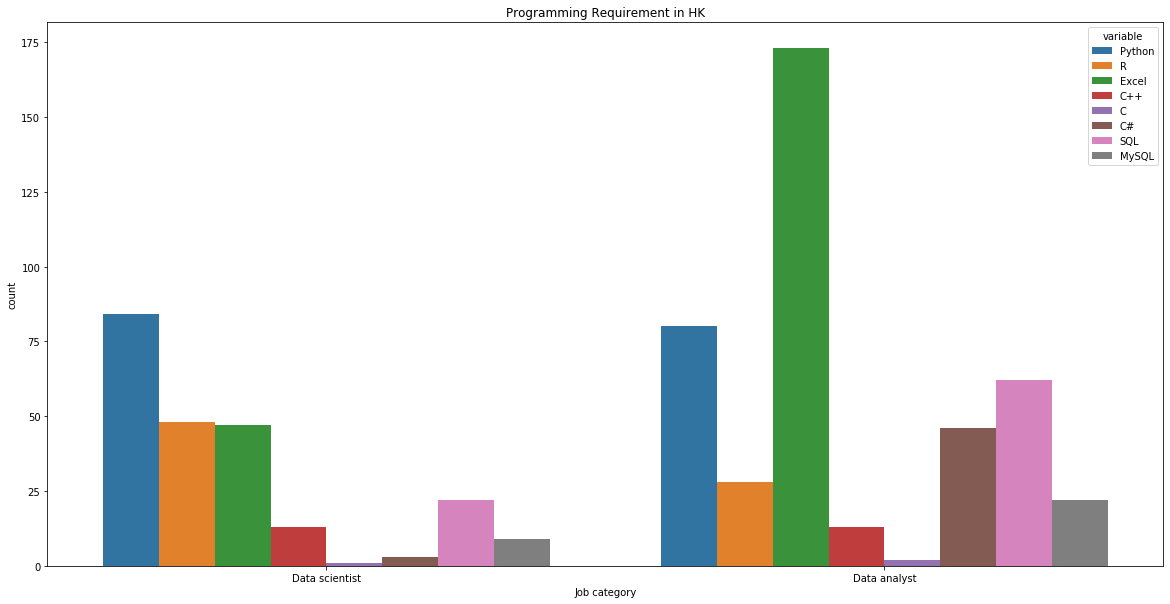

In [125]:
fig = plt.figure(figsize=(20,10))
skill_df = pd.melt(df, id_vars =['Job category'], value_vars =['Python','R','Excel','C++','C','C#','SQL','MySQL']) 
skill_df = skill_df[skill_df['value'].notnull()]
sns.countplot(data=skill_df,x=skill_df['Job category'],hue=skill_df['variable']).set_title('Programming Requirement in HK')



# Visualisation Skills

Text(0.5, 1.0, 'Visualisation Requirement in HK')

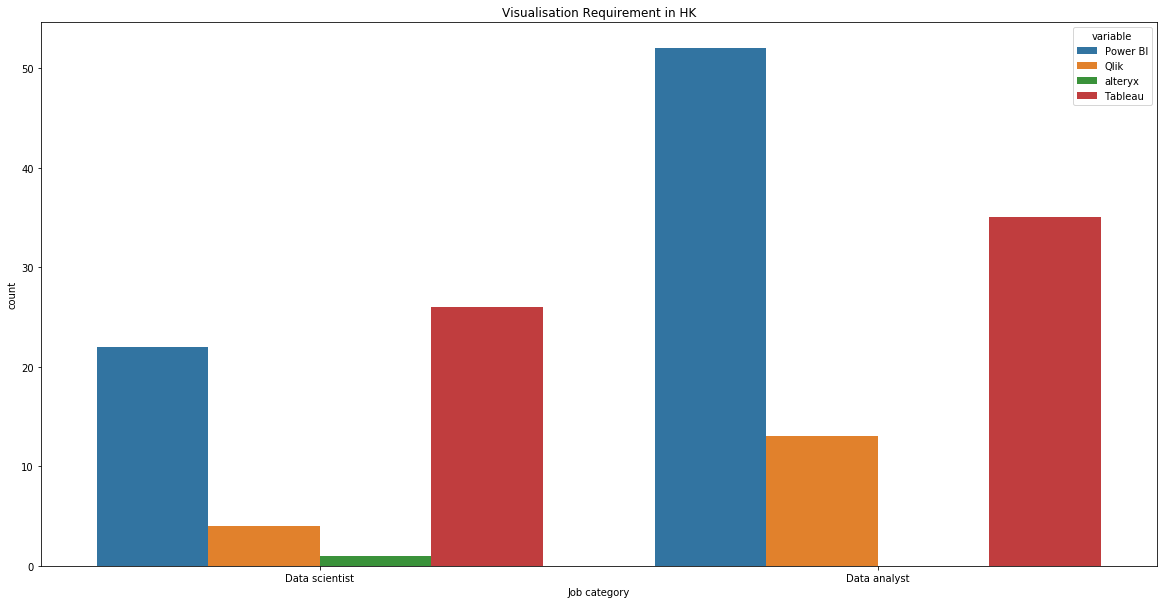

In [130]:
fig = plt.figure(figsize=(20,10))
visual_df = pd.melt(df,id_vars=['Job category'], value_vars=['Power BI','Qlik','alteryx','Tableau'])
visual_df = visual_df[visual_df['value'].notnull()]
sns.countplot(data=visual_df,x=visual_df['Job category'],hue=visual_df['variable']).set_title('Visualisation Requirement in HK')








# Star Ratings and Company Reviews

- Average or above


In [131]:
star_df = df[df['Star group'] .notnull()]

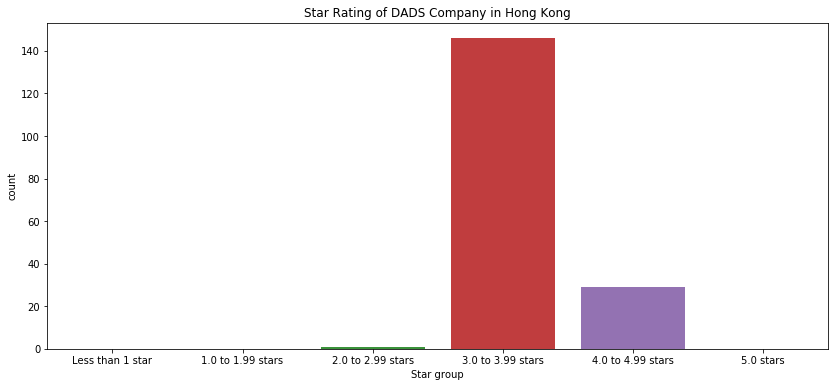

In [94]:
plt.figure(figsize=(14,6))
plot1 = sns.countplot(data=star_df, x=star_df['Star group'], order = ['Less than 1 star',
                       '1.0 to 1.99 stars',
                       '2.0 to 2.99 stars',
                       '3.0 to 3.99 stars',
                       '4.0 to 4.99 stars',
                       '5.0 stars']).set_title('Star Rating of DADS Company in Hong Kong')
plot1.get_figure().savefig("output.png")

<Figure size 3600x3600 with 0 Axes>

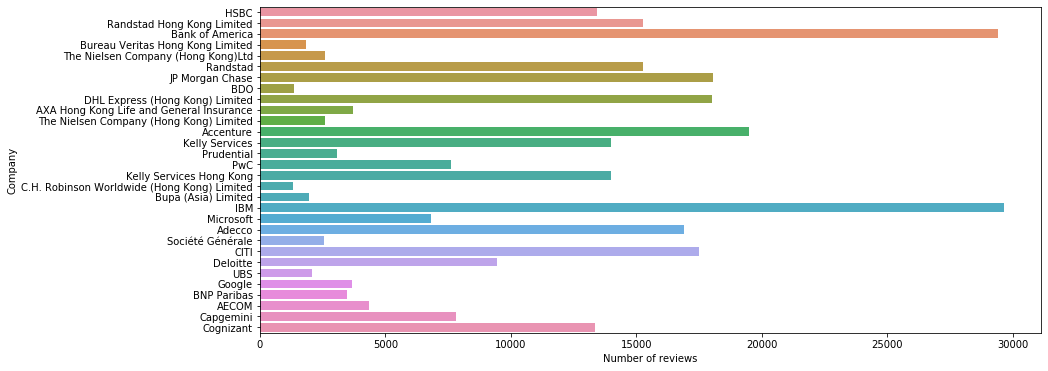

In [93]:
plt.figure(figsize=(50,50))
review_df = df.drop_duplicates(['Company'],keep ='first')
review_df = review_df[(review_df['Number of reviews'].notnull()) & (review_df['Number of reviews'] >=1000)]
plt.figure(figsize=(14,6))
plot = sns.barplot(data=review_df,y='Company', x= 'Number of reviews')
#plot.get_figure().savefig("output.png")
